1. Find Disorder for Europe, which countrains gradient various values of DALYs(small diferenes beteen data, smooth polarization)

In [2]:
import pandas as pd

# European countries only
whole_data = pd.read_csv("./../data/who_countries")

data = whole_data[whole_data["WHO_Region"] == "European Region"]
data = data.drop(columns=["WHO_Region"])
data.to_csv("./../data/map/Europe_whole")

Some statistics

In [ ]:
# # Selecting disorder

# # Testing methods

# a = data[["Entity", "Bipolar disorder"]]
# a = a[a["Entity"] == "Poland"]
# a = a["Bipolar disorder"]
# a = a.to_list()


# b = data[["Entity", "Depressive disorders"]]
# b = b[b["Entity"] == "Poland"]
# b = b["Depressive disorders"]
# b = b.to_list()

# print(len(set(a)))
# print(len(set(b)))

# print("COUNTER")
# from collections import Counter

# Counter(a)
# Counter(b)
# # say nothing

# from scipy.stats import entropy

# import numpy as np

# print("ENTROPY")
# aa = np.array(list(Counter(a).values())) / len(a)
# print(entropy(a, base=2))

# bb = np.array(list(Counter(b).values())) / len(b)
# print(entropy(b, base=2))

# print(max(a) - min(a))
# print(max(b) - min(b))


# # My method
# print("Standarization")
# # 1Standarization of data
# print(max(b), min(b))
# print(max(a), min(a))
# rangea = max(a) - min(a)
# rangeb = max(b) - min(b)
# print("RANGE")
# print(a)
# print(b)
# import matplotlib.pyplot as plt

# plt.plot(a)
# plt.plot(b)
# plt.title("My List Plot")
# plt.xlabel("Index")
# plt.ylabel("Value")
# plt.grid(True)
# plt.show()

# print("Difference method")
# scale = rangea / rangeb
# # Now all records from b we have to multipy by scale
# bnew = [x * scale for x in b]
# print(scale)


# rangea = max(a) - min(a)
# rangeb = max(bnew) - min(bnew)
# print(rangea)
# print(rangeb)
# print(a)
# print(bnew)
# import matplotlib.pyplot as plt

# plt.plot(a)
# plt.plot(bnew)
# plt.title("My List Plot")
# plt.xlabel("Index")
# plt.ylabel("Value")
# plt.grid(True)
# plt.show()

# print("Average method")
# # scale from average
# averagea = sum(a) / len(a)
# averageb = sum(b) / len(b)
# print(averagea)
# print(averageb)
# print(a)
# print(b)
# scalea = averagea / averageb

# bnew = [x * scalea for x in b]
# print(scalea)

# print("Best standarization")

# plt.plot(a)
# plt.plot(bnew)
# plt.title("My List Plot")
# plt.xlabel("Index")
# plt.ylabel("Value")
# plt.grid(True)
# plt.show()

# print("a", a)
# print("B", bnew)
# print("var")
# print(np.var(a))
# print(np.var(bnew))
# print("std")
# print(np.std(a))
# print(np.std(bnew))
# print("entropy")
# counts, _ = np.histogram(a, bins="auto", density=True)
# ent = entropy(counts + 1e-9)
# print(ent)
# counts, _ = np.histogram(bnew, bins="auto", density=True)
# ent = entropy(counts + 1e-9)
# print(ent)

Selecting the most diverse disorder (method above)

In [ ]:
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("./../data/map/Europe_whole")

disorders = data.columns.tolist()
disorders = disorders[4:]
comparison = pd.DataFrame(
    columns=["Disorder", "Variance", "Standard deviation", "Entropy", "Standarization"]
)

# print("****************No standarization*****************")
for disorder in disorders:
    data_dis = data[disorder]
    data_dis = data_dis.to_list()

    varation = np.var(data_dis)
    standard_deviation = np.std(data_dis)
    counts, _ = np.histogram(data_dis, bins="auto", density=True)
    entropy_value = entropy(counts + 1e-9)

    new_row = pd.DataFrame(
        [
            {
                "Disorder": disorder,
                "Variance": varation,
                "Standard deviation": standard_deviation,
                "Entropy": entropy_value,
                "Standarization": "NO",
            }
        ]
    )
    comparison = pd.concat([comparison, new_row], ignore_index=True)
#     print("Calculations for:",disorder)
#     print("Variation: ",varation)
#     print("Standard deviation: ", standard_deviation)
#     print("Entropy",entropy_value)
#     print("____________________")
#     plt.plot(data_dis,label=disorder)
# plt.legend()
# plt.xlabel("Index")
# plt.ylabel("Value")
# plt.grid(True)
# plt.show()


# After standarization
# print("****************Standarized*****************")

datas = data
standard_list = []
scales = []
scaled_data = []
for disorder in disorders:
    data_dis = data[disorder]
    data_dis = data_dis.to_list()
    average = sum(data_dis) / len(data_dis)
    standard_list.append(average)

for i in range(len(disorders)):
    scale = standard_list[0] / standard_list[i]
    scales.append(scale)

    data_dis = data[disorders[i]]
    data_dis = data_dis.to_list()

    new_data = [z * scale for z in data_dis]

    scaled_data.append(new_data)

    varation = np.var(new_data)
    standard_deviation = np.std(new_data)
    counts, _ = np.histogram(new_data, bins="auto", density=True)
    entropy_value = entropy(counts + 1e-9)

    new_row = pd.DataFrame(
        [
            {
                "Disorder": disorders[i],
                "Variance": varation,
                "Standard deviation": standard_deviation,
                "Entropy": entropy_value,
                "Standarization": "YES",
            }
        ]
    )
    comparison = pd.concat([comparison, new_row], ignore_index=True)

#     print("Scalled calculations for:", disorders[i])
#     print("Variation: ", varation)
#     print("Standard deviation: ", standard_deviation)
#     print("Entropy", entropy_value)
#     print("____________________")
#     plt.plot(new_data, label=str(disorders[i]))
# plt.legend()
# plt.xlabel("Index")
# plt.ylabel("Value")
# plt.grid(True)
# plt.show()

comparison.to_csv("./../data/map/comparison")

C:\Users\oktaw\AppData\Local\Temp\ipykernel_18800\2209112199.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison = pd.concat([comparison, new_row], ignore_index=True)


In [5]:
data = pd.read_csv("./../data/map/comparison")
data = data.sort_values(
    "Entropy"
)  # may change to: Variance,  Standard deviation, and Entropy

Choosen Depresion and Schizofrenia but I made for all

Depressive disorders
Schizophrenia
Bipolar disorder
Eating disorders
Anxiety disorders


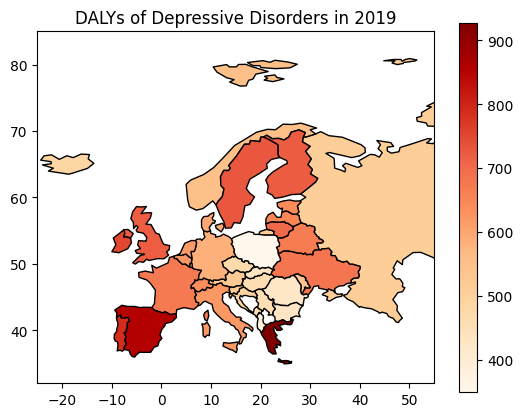

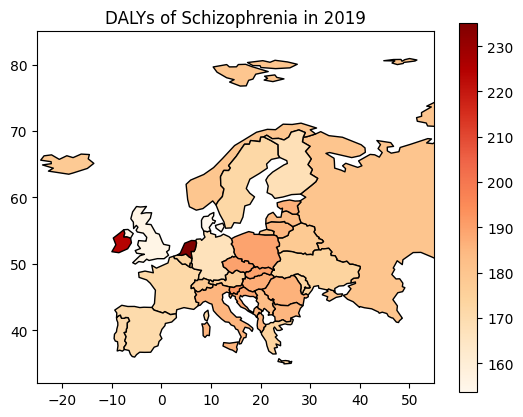

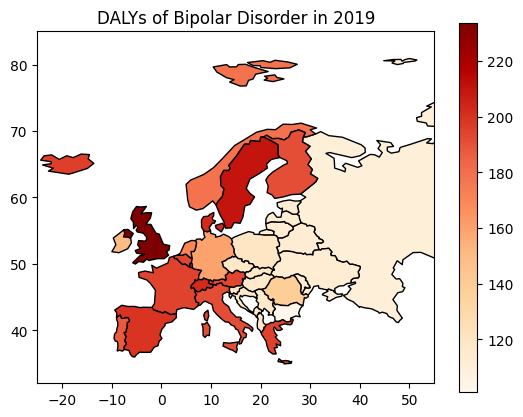

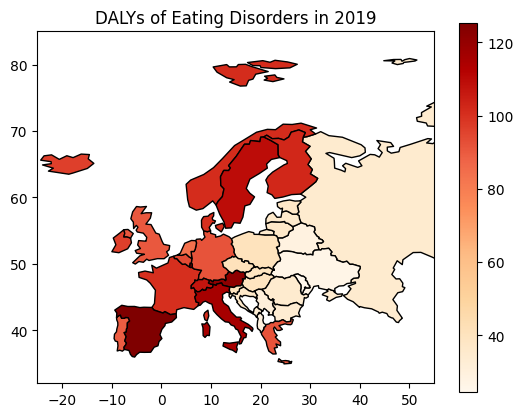

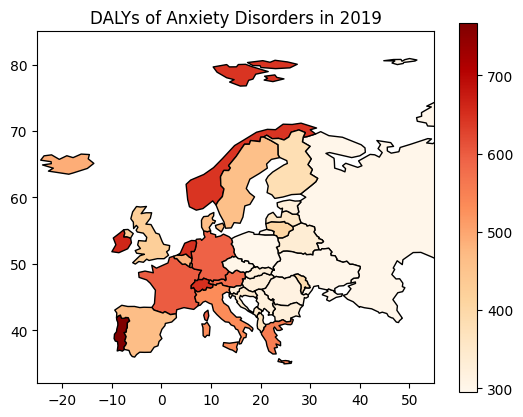

In [ ]:
# Data for year 2019 and the break for coffe-its too much

import geopandas as gpd
import matplotlib.pyplot as plt

data = pd.read_csv("./../data/map/Europe_whole")

disorders = data.columns.to_list()
disorders = disorders[4:]
data = data[data["Year"] == 2019]

world = gpd.read_file("./../data/mapa/ne_110m_admin_0_countries.shp")
europe = world[world["CONTINENT"] == "Europe"]

for disorder in disorders:
    disorder = str(disorder)
    print(disorder)
    data_dis = data[["Entity", disorder]]
    europe = world[world["CONTINENT"] == "Europe"]
    europe = europe.merge(data_dis, how="left", left_on="NAME", right_on="Entity")
    europe.plot(column=disorder, cmap="OrRd", legend=True, edgecolor="Black")
    plt.xlim(-25, 55)
    plt.ylim(32, 85)
    plt.title("DALYs of " + disorder.title() + " in 2019")
    plt.axis("on")
    plt.savefig("./../plots/mapDAILYs_" + disorder + "_Europe")
    plt.show